In [32]:
import os
import sys
import time
import random
import pandas as pd
from algorithms import *

def generate_random_array(size, low, high):
    return [random.randint(low, high) for _ in range(size)]

def hash_from_list(lst):
    return hash(tuple(lst))

def progress_bar(progress, total, length=40):
    percent = progress / total
    filled = int(length * percent)
    bar = '=' * filled + '-' * (length - filled)
    sys.stdout.write(f'\r[{bar}] {percent:.0%}')
    sys.stdout.flush()

In [33]:
min_size, max_size, freq, runs = 100000, 1000000, 50000, 5
low, high = 1, 1000

results = {
    "List ID": [],
    "Algorithm": [],
    "Size": [],
    "Basic ops.": [],
    "Time (ms)": [],
    "Low": [],
    "High": [],
}

if False:
    for size in range(min_size, max_size, freq):
        for _ in range(runs):
            arr = generate_random_array(size, low, high)

            if False:
                start_time = time.time()
                sorted_arr, count = bubble_sort(arr.copy())
                end_time = time.time()
                results["List ID"].append(hash_from_list(arr))
                results["Algorithm"].append("Bubble Sort")
                results["Size"].append(size)
                results["Basic ops."].append(count)
                results["Time (ms)"].append((end_time - start_time) * 1000)
                results["Low"].append(low)
                results["High"].append(high)

            if False:
                start_time = time.time()
                sorted_arr, count = selection_sort(arr.copy())
                end_time = time.time()
                results["List ID"].append(hash_from_list(arr))
                results["Algorithm"].append("Selection Sort")
                results["Size"].append(size)
                results["Basic ops."].append(count)
                results["Time (ms)"].append((end_time - start_time) * 1000)
                results["Low"].append(low)
                results["High"].append(high)

            if False:
                start_time = time.time()
                sorted_arr, count = insertion_sort(arr.copy())
                end_time = time.time()
                results["List ID"].append(hash_from_list(arr))
                results["Algorithm"].append("Insertion Sort")
                results["Size"].append(size)
                results["Basic ops."].append(count)
                results["Time (ms)"].append((end_time - start_time) * 1000)
                results["Low"].append(low)
                results["High"].append(high)

            start_time = time.time()
            sorted_arr, count = counting_sort(arr.copy())
            end_time = time.time()
            results["List ID"].append(hash_from_list(arr))
            results["Algorithm"].append("Counting Sort")
            results["Size"].append(size)
            results["Basic ops."].append(count)
            results["Time (ms)"].append((end_time - start_time) * 1000)
            results["Low"].append(low)
            results["High"].append(high)

            start_time = time.time()
            sorted_arr, count = radix_sort(arr.copy())
            end_time = time.time()
            results["List ID"].append(hash_from_list(arr))
            results["Algorithm"].append("Radix Sort")
            results["Size"].append(size)
            results["Basic ops."].append(count)
            results["Time (ms)"].append((end_time - start_time) * 1000)
            results["Low"].append(low)
            results["High"].append(high)

            start_time = time.time()
            sorted_arr, count = quick_sort(arr.copy())
            end_time = time.time()
            results["List ID"].append(hash_from_list(arr))
            results["Algorithm"].append("Quick Sort")
            results["Size"].append(size)
            results["Basic ops."].append(count)
            results["Time (ms)"].append((end_time - start_time) * 1000)
            results["Low"].append(low)
            results["High"].append(high)

            start_time = time.time()
            sorted_arr, count = merge_sort(arr.copy())
            end_time = time.time()
            results["List ID"].append(hash_from_list(arr))
            results["Algorithm"].append("Merge Sort")
            results["Size"].append(size)
            results["Basic ops."].append(count)
            results["Time (ms)"].append((end_time - start_time) * 1000)
            results["Low"].append(low)
            results["High"].append(high)

            start_time = time.time()
            sorted_arr, count = heap_sort(arr.copy())
            end_time = time.time()
            results["List ID"].append(hash_from_list(arr))
            results["Algorithm"].append("Heap Sort")
            results["Size"].append(size)
            results["Basic ops."].append(count)
            results["Time (ms)"].append((end_time - start_time) * 1000)
            results["Low"].append(low)
            results["High"].append(high)

            start_time = time.time()
            sorted_arr, count = timsort(arr.copy())
            end_time = time.time()
            results["List ID"].append(hash_from_list(arr))
            results["Algorithm"].append("Timsort")
            results["Size"].append(size)
            results["Basic ops."].append(count)
            results["Time (ms)"].append((end_time - start_time) * 1000)
            results["Low"].append(low)
            results["High"].append(high)

            progress_bar(size, max_size)

    if os.path.exists("results.xlsx"):
        results_old = pd.read_excel("results.xlsx")
        results_new = pd.DataFrame(results)
        results = pd.concat([results_new, results_old], ignore_index=True)
        results.to_excel("results.xlsx", index=False)
    else:
        results = pd.DataFrame(results)
        results.to_excel("results.xlsx", index=False)


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 300,
})

In [35]:
results = pd.read_excel("results.xlsx")

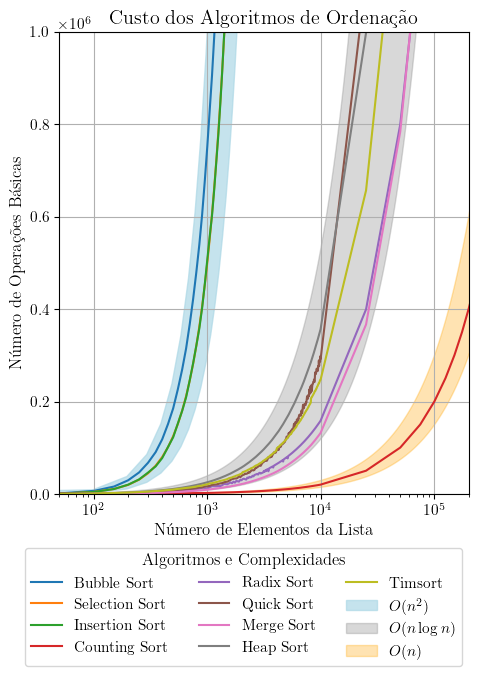

In [36]:
# Results
df01 = results[(results["Low"] == 1) & (results["High"] == 1000)]
df01 = df01.groupby(["Size", "Algorithm"], as_index=False)["Basic ops."].mean()

# Define a custom order
custom_order = [
    "Bubble Sort", "Selection Sort", "Insertion Sort",
    "Counting Sort", "Radix Sort",
    "Quick Sort", "Merge Sort", "Heap Sort", "Timsort",
]
df01["Algorithm"] = pd.Categorical(df01["Algorithm"], categories=custom_order, ordered=True)

# Basic operations plot
plt.figure(figsize=(5, 7))
sns.lineplot(data=df01, x="Size", y="Basic ops.", hue="Algorithm", alpha=1)

# Theoretical complexity lines
x_vals = np.linspace(df01["Size"].min(), df01["Size"].max(), 10000)
plt.fill_between(x_vals, 0.3*(x_vals**2), 1* (x_vals**2), color='lightblue', alpha=0.7, label=r'$O(n^2)$')
plt.fill_between(x_vals, 0.9 * (x_vals*np.log2(x_vals)), 4 * (x_vals*np.log2(x_vals)), color='grey', alpha=0.3, label=r'$O(n \log n)$')
plt.fill_between(x_vals, 1.5 * (x_vals), 3 * (x_vals), color='orange', alpha=0.3, label=r'$O(n)$')


plt.title(f"Custo dos Algoritmos de Ordenação")
plt.xlabel("Número de Elementos da Lista")
plt.ylabel("Número de Operações Básicas")
plt.legend(title="Algoritmos e Complexidades", loc='upper center', bbox_to_anchor=(0.45, -0.1), ncol=3)
plt.grid(True)
plt.xlim(50, 2*10**5)
plt.ylim(0, 10**6)
plt.xscale("log")
plt.tight_layout()
plt.savefig("sorting_complexities.png", transparent=True)
plt.show()
